<a href="https://colab.research.google.com/github/Anaberen/Boosting-Algorithms/blob/main/web%20scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scraping Web

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# URL del sitio web que contiene los datos url = "https://ycharts.com/companies/TSLA/revenues"
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)


#Step 3: Transform the HTML

hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(url, headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'html.parser')


#Find all tables

tables = soup.find_all("table", class_ = "historical_data_table table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [3]:
# Find all tables
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [4]:
table = soup.find('table', class_='tesla-data')
table

In [5]:
for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

In [6]:
tesla_revenue_table = pd.DataFrame(columns=['fecha', 'beneficios'])
for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        fecha = col[0].text
        beneficios = col[1].text.replace('$', '').replace(',', '')
        tesla_revenue_table = pd.concat([tesla_revenue_table, pd.DataFrame({
                'fecha': fecha,
                'beneficios': beneficios},
                index=[0])], ignore_index=True)


tesla_revenue_table.head()

,fecha,beneficios
0,2024-06-30,25500
1,2024-03-31,21301
2,2023-12-31,25167
3,2023-09-30,23350
4,2023-06-30,24927


PROCESA EL DATA FRAME

In [7]:
tesla_revenue = tesla_revenue_table[tesla_revenue_table["beneficios"] != ""]
tesla_revenue.head()

,fecha,beneficios
0,2024-06-30,25500
1,2024-03-31,21301
2,2023-12-31,25167
3,2023-09-30,23350
4,2023-06-30,24927


ALMACENA LOS DATOS EN SQLITE

In [8]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [9]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE beneficios (fecha, beneficios)""")

In [10]:
tesla_tuples = list(tesla_revenue_table.to_records(index = False))
tesla_tuples[:5]

[('2024-06-30', '25500'),
 ('2024-03-31', '21301'),
 ('2023-12-31', '25167'),
 ('2023-09-30', '23350'),
 ('2023-06-30', '24927')]

In [11]:
cursor.executemany("INSERT INTO beneficios VALUES (?,?)", tesla_tuples)
connection.commit()

In [12]:
for row in cursor.execute("SELECT * FROM beneficios"):
    print(row)

('2024-06-30', '25500')
('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('20

VISUALIZACIÓN DE SERIES DE TIEMPO

<ipython-input-13-aff582c0db7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue["fecha"] = pd.to_datetime(tesla_revenue["fecha"])
<ipython-input-13-aff582c0db7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue["beneficios"] = tesla_revenue["beneficios"].astype('int')


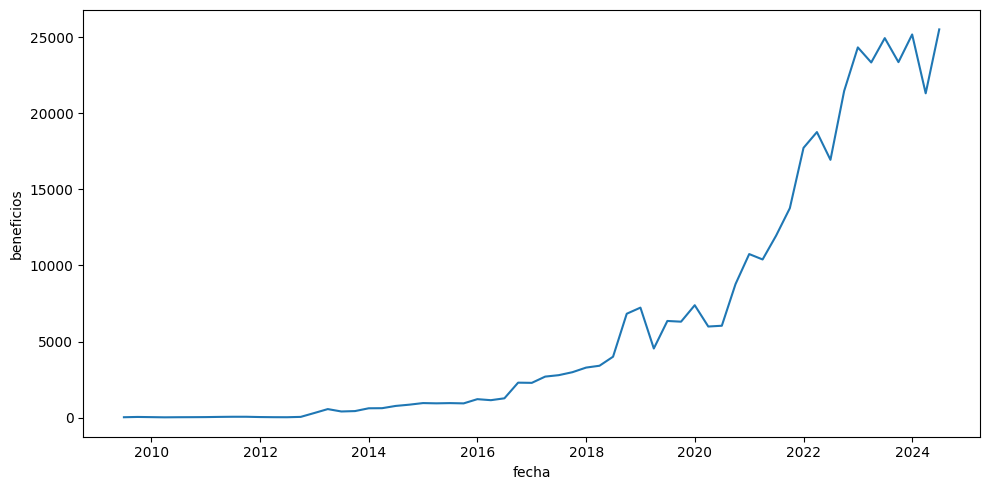

In [13]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["fecha"] = pd.to_datetime(tesla_revenue["fecha"])
tesla_revenue["beneficios"] = tesla_revenue["beneficios"].astype('int')
sns.lineplot(data = tesla_revenue, x = "fecha", y = "beneficios")

plt.tight_layout()

plt.show()

BENEFICIO BRUTO ANUAL


<ipython-input-14-4fb86a878025>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue["fecha"] = pd.to_datetime(tesla_revenue["fecha"])


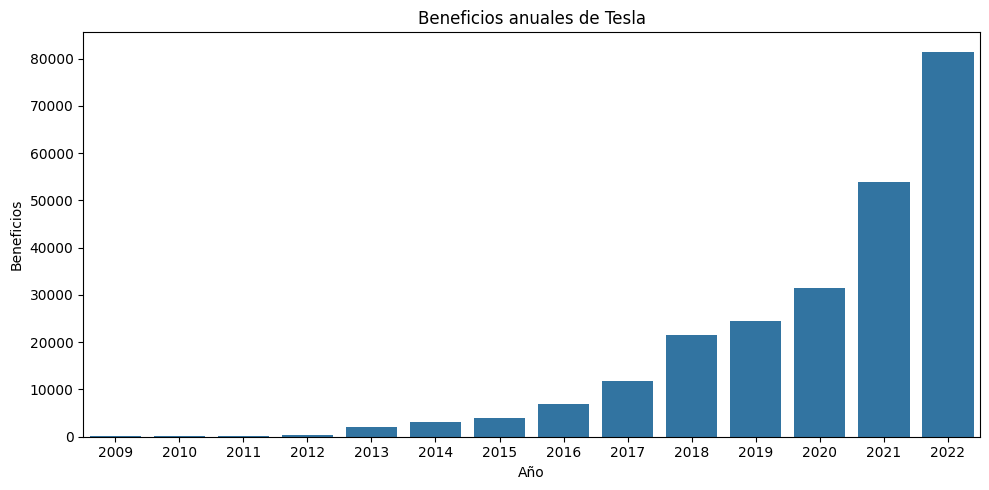

In [14]:
tesla_revenue["fecha"] = pd.to_datetime(tesla_revenue["fecha"])

# Agrupo por año y sumar solo los beneficios para poder sumarlos.
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["fecha"].dt.year)['beneficios'].sum().reset_index()


fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data=tesla_revenue_yearly[tesla_revenue_yearly["fecha"] < 2023], x="fecha", y="beneficios")
plt.title("Beneficios anuales de Tesla")
plt.xlabel("Año")
plt.ylabel("Beneficios")
plt.tight_layout()
plt.show()

AUTOCORRELACION DE BENEFICIOS

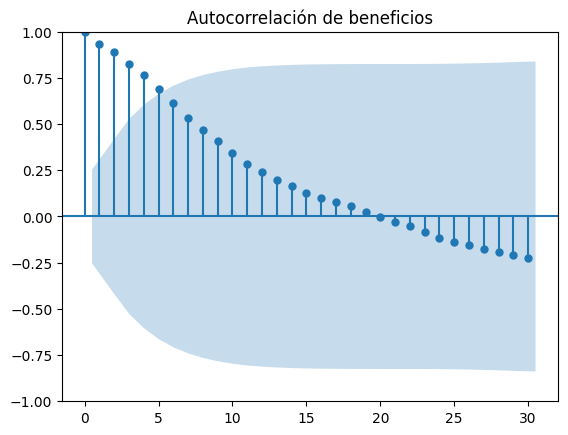

In [15]:
plot_acf(tesla_revenue['beneficios'], lags= 30)
plt.title('Autocorrelación de beneficios')
plt.show()